In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Problem 1

#### Creation of Dillution vs Optical Density Axis  


In [2]:
t_Simple = np.array([0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5]).reshape(-1,1)
t_Complex = np.array([0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0,7.5,8.0]).reshape(-1,1)
OD_Simple = np.array([0.06,0.08,0.11,0.14,0.20,0.26,0.37,0.49,0.35,0.44,0.52,0.52])
OD_Complex = np.array([0.06,0.06,0.06,0.07,0.10,0.13,0.18,0.26,0.32,0.43,0.48,0.50,0.52,0.3,0.42,0.5,0.5])

#### Plotting Optical Density vs Dillution

Text(0.5, 1.0, 'Time vs Optical Density')

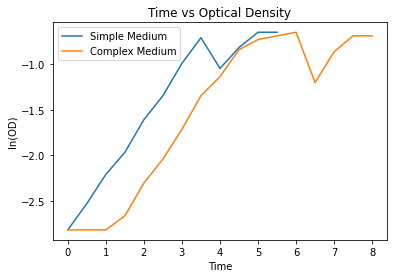

In [3]:
plt.plot(t_Simple,np.log(OD_Simple),'-', label = "Simple Medium")
plt.plot(t_Complex,np.log(OD_Complex),'-', label = "Complex Medium")
plt.legend()
plt.xlabel("Time")
plt.ylabel("ln(OD)")
plt.title("Time vs Optical Density")

#### Growth Curve Explination

In this graph we begin with the lag phase of the cell growth where the cell adjust to it's environment and has no growth for a period. Following is the phase where exponential cell growth begins untill the substrate is used up, at this point cell death begins to outpace cell growth causing the optical density to drop. 

A short period after this the optical density may begin to rise again, this being caused by cryptic growth where lysed cell products are used as a substrate.

#### Lag Time and Differences

Here we see that there is a lag time of ~30 minutes for the simple medium whereas the complex medium shows a lagtime of 1 hour.

We can also make note that the complex medium is growing at a slower rate based on the lower optical density, this would imply that the complex medium involves slower cell growth from the inclusion of lactose.

#### Overall Yield Factors

$$Y = - \frac{X2 - X1}{S2 - S1}$$

##### Simple Medium

In [4]:
So_simple = 0.3
Y = -((OD_Simple[-6] - OD_Simple[0])*0.174)/(0 - So_simple)
print("The overall yield for the simple medium is:",Y)

The overall yield for the simple medium is: 0.1798


##### Complex Medium

Here we note that since glucose is half of the simple medium we would expect the glucose to be used up in half the time it took for the simple medium to complete it's consumption of glucose based on their similar mu max values. Therefore we shall take the cell concentration at t = 2 hours to be when all of the glucose has been consumed 

In [5]:
So_complex_glucose = 0.15
Y = -((OD_Complex[4] - OD_Complex[0])*0.174)/(0 - So_complex_glucose)
print("The overall yield for the complex medium for glucose is:",round(Y,3))

The overall yield for the complex medium for glucose is: 0.046


In [6]:
So_complex_lactose = 0.15
Y = -((OD_Complex[-5] - OD_Complex[4])*0.174)/(0 - So_complex_lactose)
print("The overall yield for the complex medium for glucose is:",round(Y,3))

The overall yield for the complex medium for glucose is: 0.487


#### Solving for Mu Max in Simple Medium

In [7]:
### Fitting data Optical Density simple Medium
model = LinearRegression().fit(t_Simple[2:-5],np.log(OD_Simple[2:-5]))
OD_Simplemodel = []

for iter in t_Simple:
    modelEqnSoln = model.coef_*iter + model.intercept_
    OD_Simplemodel.append(modelEqnSoln)
np.array(OD_Simplemodel);
###

print("mu max is:",round(model.coef_[0],3),"for a simple medium")

mu max is: 0.609 for a simple medium


# Solving for Mu Max in Complex Medium

In [8]:
### Fitting data Optical Density Complex Medium
model = LinearRegression().fit(t_Complex[4:-7],np.log(OD_Complex[4:-7]))
OD_Complexmodel = []

for iter in t_Complex:
    modelEqnSoln = model.coef_*iter + model.intercept_
    OD_Complexmodel.append(modelEqnSoln)
np.array(OD_Complexmodel);
print("mu max is:",round(model.coef_[0],3),"for a complex medium")
###

mu max is: 0.592 for a complex medium


# Plotting Regression of Growth Curve

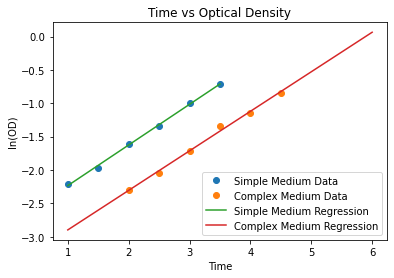

In [9]:
plt.plot(t_Simple[2:-4],(np.log(OD_Simple[2:-4])),'o', label = "Simple Medium Data")
plt.plot(t_Complex[4:-7],(np.log(OD_Complex[4:-7])),'o', label = "Complex Medium Data")
plt.plot(t_Simple[2:-4],(OD_Simplemodel[2:-4]),'-', label = "Simple Medium Regression")
plt.plot(t_Complex[2:-4],(OD_Complexmodel[2:-4]),'-', label = "Complex Medium Regression")
plt.xlabel("Time")
plt.ylabel("ln(OD)")
plt.title("Time vs Optical Density")
plt.legend()

# Problem 2

In [10]:
### Parameters ###
So = 5 # g/l
uMax =  0.2 # h^-1
Y_ps = 0.2 # g P/gS
Y_xs = 0.4 # gX/gS
Ks = 0.2 # g/l
kd = 0.002 # h^-1
qP = 0.1 # gP/g X-h
D = np.arange(0.01,0.19,0.01) # Dillution 
###

### Equations ###
S = (Ks*(D+kd))/(uMax-D-kd)
X = Y_xs*(So - S) * (D/(D+qP*(Y_xs/Y_ps)+kd))
DP = qP*X
P = DP/D
DX = D*Y_xs*(So-S)
###


Text(0.5, 0, 'Dillution')

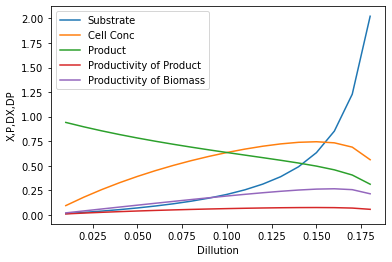

In [11]:
### Plotting ###
plt.plot(D,(S),'-', label = "Substrate")
plt.plot(D,(X),'-', label = "Cell Conc")
plt.plot(D,(P),'-', label = "Product")
plt.plot(D,(DP),'-', label = "Productivity of Product")
plt.plot(D,(DX),'-', label = "Productivity of Biomass")
plt.legend()
plt.ylabel("X,P,DX,DP")
plt.xlabel("Dillution")
###

Text(0.5, 0, 'Dillution')

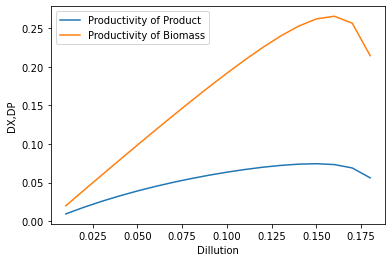

In [12]:
plt.plot(D,(DP),'-', label = "Productivity of Product")
plt.plot(D,(DX),'-', label = "Productivity of Biomass")
plt.legend()
plt.ylabel("DX,DP")
plt.xlabel("Dillution")

Based on this graph we can see that the optimum dilution rate that maximizes biomass productivity occurs at a dillution of ~0.160